# Heart attack analysis. EDA and prediction

We have data on patients seen by a cardiologist. The main goal of this notebook is to build a machine learning model, that will be able to predict the risk of a heart attack based on a patient's health condition.

Here we have the description of the features:

age - age in years

sex - sex (0 = female; 1 = male)

cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

trtbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - fasting blood sugar > 120 mg/dl (0 = false; 1 = true)

restecg - resting electrocardiographic results (0 = normal; 1 = hypertrophy; 2 = having ST-T wave abnormality)

thalachh - maximum heart rate achieved

exng - exercise induced angina (0 = no; 1 = yes)

oldpeak - ST depression induced by exercise relative to rest

slp - the slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)

caa - number of major vessels (0-4) colored by flourosopy

thall - thallium stress test (1 = fixed defect; 2 = reversable defect; 3 = normal)

output - 0 = less chance of heart attack; 1 = more chance of heart attack

# Import libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
#read the dataset
df=pd.read_csv('heart.csv')


In [26]:
df.shape   #1000,14
#ML(equations) vs DL(neural network is Data hungry)

(303, 14)

In [27]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [28]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [31]:
df.shape

(303, 14)

In [32]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [33]:
type(df)

pandas.core.frame.DataFrame

1.The dataset includes information about 303 patients.

2.There are 13 features. Even though all of them are numeric type, only 5 are really numerical, the rest are categorical.

            categorical features : sex, cp, fbs, restecg, exng, slp, caa, thall
   
            numerical features : age, trtbps, chol, thalachh, oldpeak

3.The target is output. 0 is low risk patient, 1 is high risk patient.

4.There are no missing values.

In [35]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Cleaning


# Check for Duplicate value

In [38]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [39]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

There is one duplicate we observed and delete it

In [41]:
df.drop_duplicates(inplace=True)    #163,165
df.reset_index(drop=True, inplace=True)
df.shape

(302, 14)

In [42]:
df["age"]

0      63
1      37
2      41
3      56
4      57
       ..
297    57
298    45
299    68
300    57
301    57
Name: age, Length: 302, dtype: int64

In [43]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [44]:
df.iloc[164:165,:]   #[Row(Start:end-1),col(start:end)] end-1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0


# Check for Null Val

In [46]:
df.isna().sum()
# df.isnull().sum()

# df.dropna()   #drop nul values
# df.fillna()   #fill null values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Checking Outliers

<Axes: >

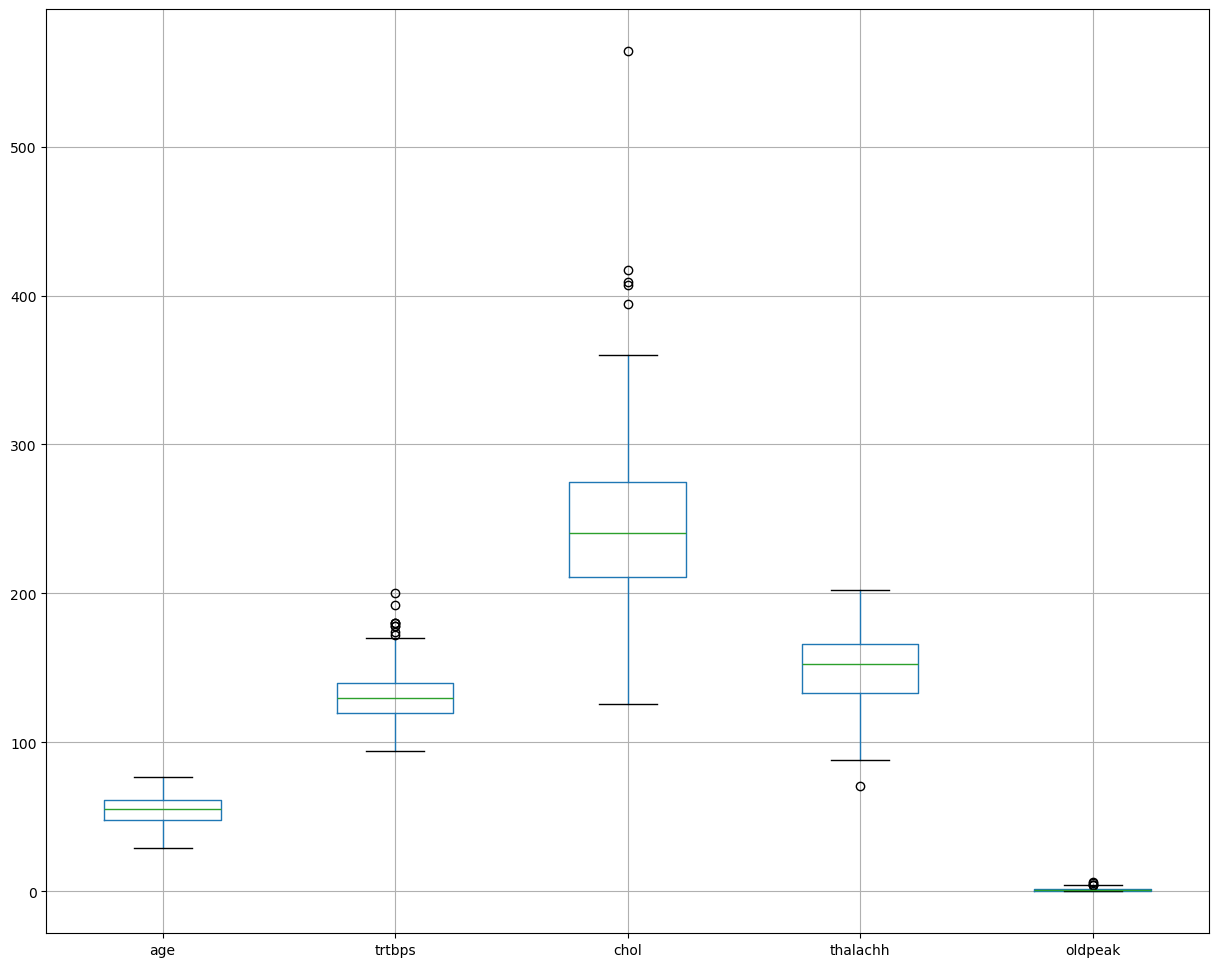

In [48]:
# Checking for the presence of outliers in numeric cols ('age','trtbps','chol','thalachh','oldpeak')
#numeric data only not for categorical data
plt.figure(figsize=(15,12))
df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak']) 

No outliers are present in age attribute but there are outliers in trtbps, chol, thalachh and oldpeak attributes. 
So we need to get the exact values of outliers using IQR method.

In [50]:
#Advanced process to be done while buiding model for Machine learning. Therefore, this process can be opted out.
#Finding values of outliers(IQR method)
# 1. Sort the dataset in ascending order,
# 2 calculate the 1st and 3rd quartiles(Q1, Q3)
# 3  compute IQR=Q3-Q1,
# 4 compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR),
# 5 loop through the values of the dataset and check for those who fall below the lower bound 
#and above the upper bound and mark them as outliers


# Visualization

In this section, we will get an idea about our patients by considering all the features separately.

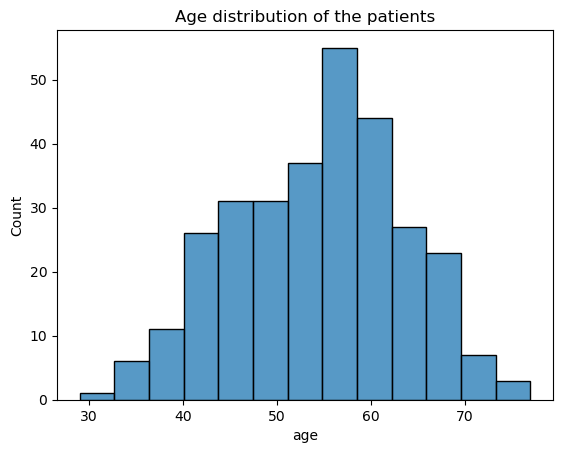

In [53]:
#Age
sns.histplot(df.age)
plt.title('Age distribution of the patients')
plt.show()

The dataset contains information about older patients, which is to be expected. The majority of the patients are older than 40.  The peak is at 57-58 years old.

In [55]:
#Gender
df.sex.value_counts()

sex
1    206
0     96
Name: count, dtype: int64

0=Female

1=Male

We have almost 2 times more males than females

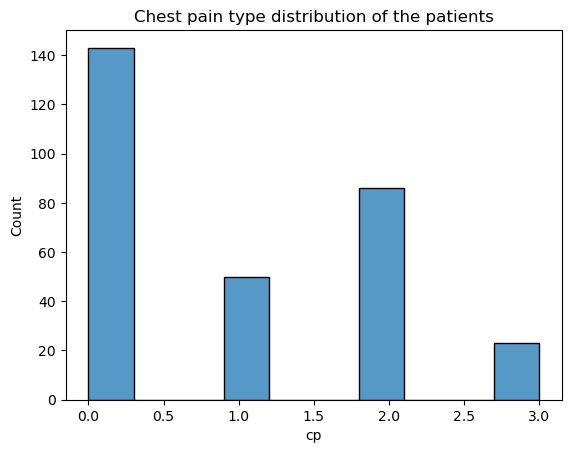

In [57]:
#Chest pain type
sns.histplot(df.cp)
plt.title('Chest pain type distribution of the patients')
plt.savefig('c11.png')
plt.show()


1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic

Almost a half of the patients have no pain in the chest

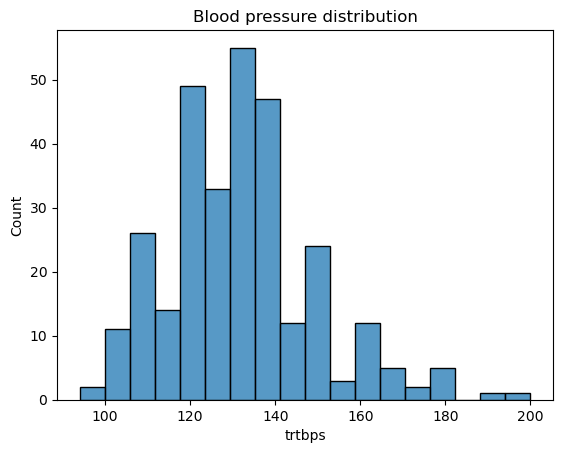

In [59]:
#Resting blood pressure
sns.histplot(df.trtbps)
plt.title('Blood pressure distribution')
plt.show()

According to the European Society of Cardiology, the following classification for blood pressure is applied:

        Category           Blood pressure

        Optimal	              < 120

        Normal	              120–129

        High normal	         130–139

        Grade 1 hypertension	140–159

        Grade 2 hypertension	160–179

        Grade 3 hypertension	 ≥ 180

In our dataset, the resting blood pressure distribution has a peak at a value of approx. 150

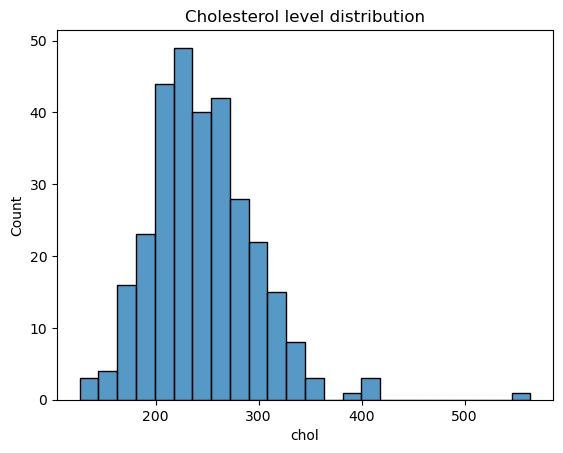

In [61]:
#Cholesterol
sns.histplot(df.chol)
plt.title('Cholesterol level distribution')
plt.show()

In [62]:
#Fasting blood sugar
df.fbs.value_counts()

fbs
0    257
1     45
Name: count, dtype: int64

Reminder: 0 means less or equal to 120 mg/dl (which is good), 1 means higher than 120 mg/dl.

The majority of the patients don't have serious sugar problems.

0 = normal; 1 = hypertrophy; 2 = having ST-T wave abnormality

About 50% of the patients have hypertrophy. Only a few of the patients have ST-T wave abnormality. The rest of them have normal results.

In our dataset, highest value for thalachh is apprx. 170-180

In [66]:
#The chance of heart attack
df.output.value_counts()

output
1    164
0    138
Name: count, dtype: int64

 0 = less chance of heart attack; 1 = more chance of heart attack

54.3% of the patients have a high risk of heart attack, 45.7% - low risk of a heart attack.


The conclusion is that people with good health condition has a lower chance to a heart attack.

In [70]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Text(0.5, 1.0, 'Correlation map')

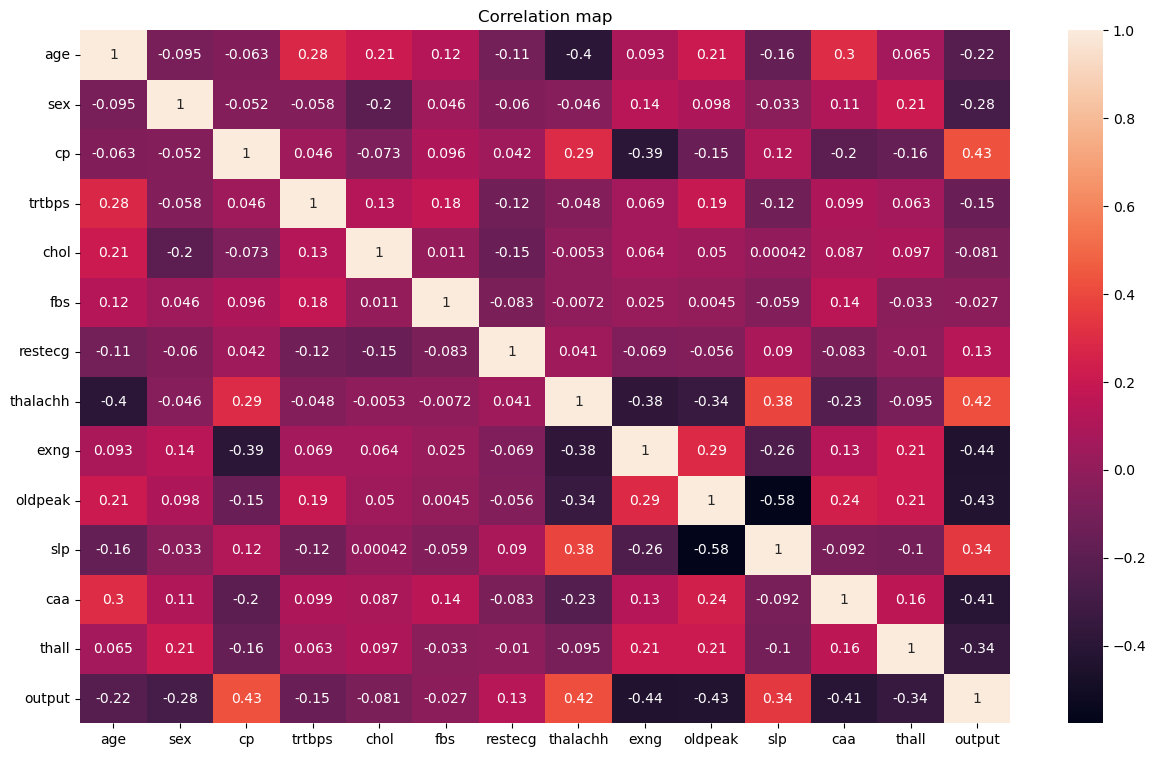

In [71]:
#Finding the correlation
plt.figure(figsize=(15,9));
sns.heatmap(df.corr(),annot=True);
# sns.heatmap()
plt.title("Correlation map")

From the above heatmap we can observe that the features 'cp', 'thalachh', 'slp' are highly correlated to output (target variable).

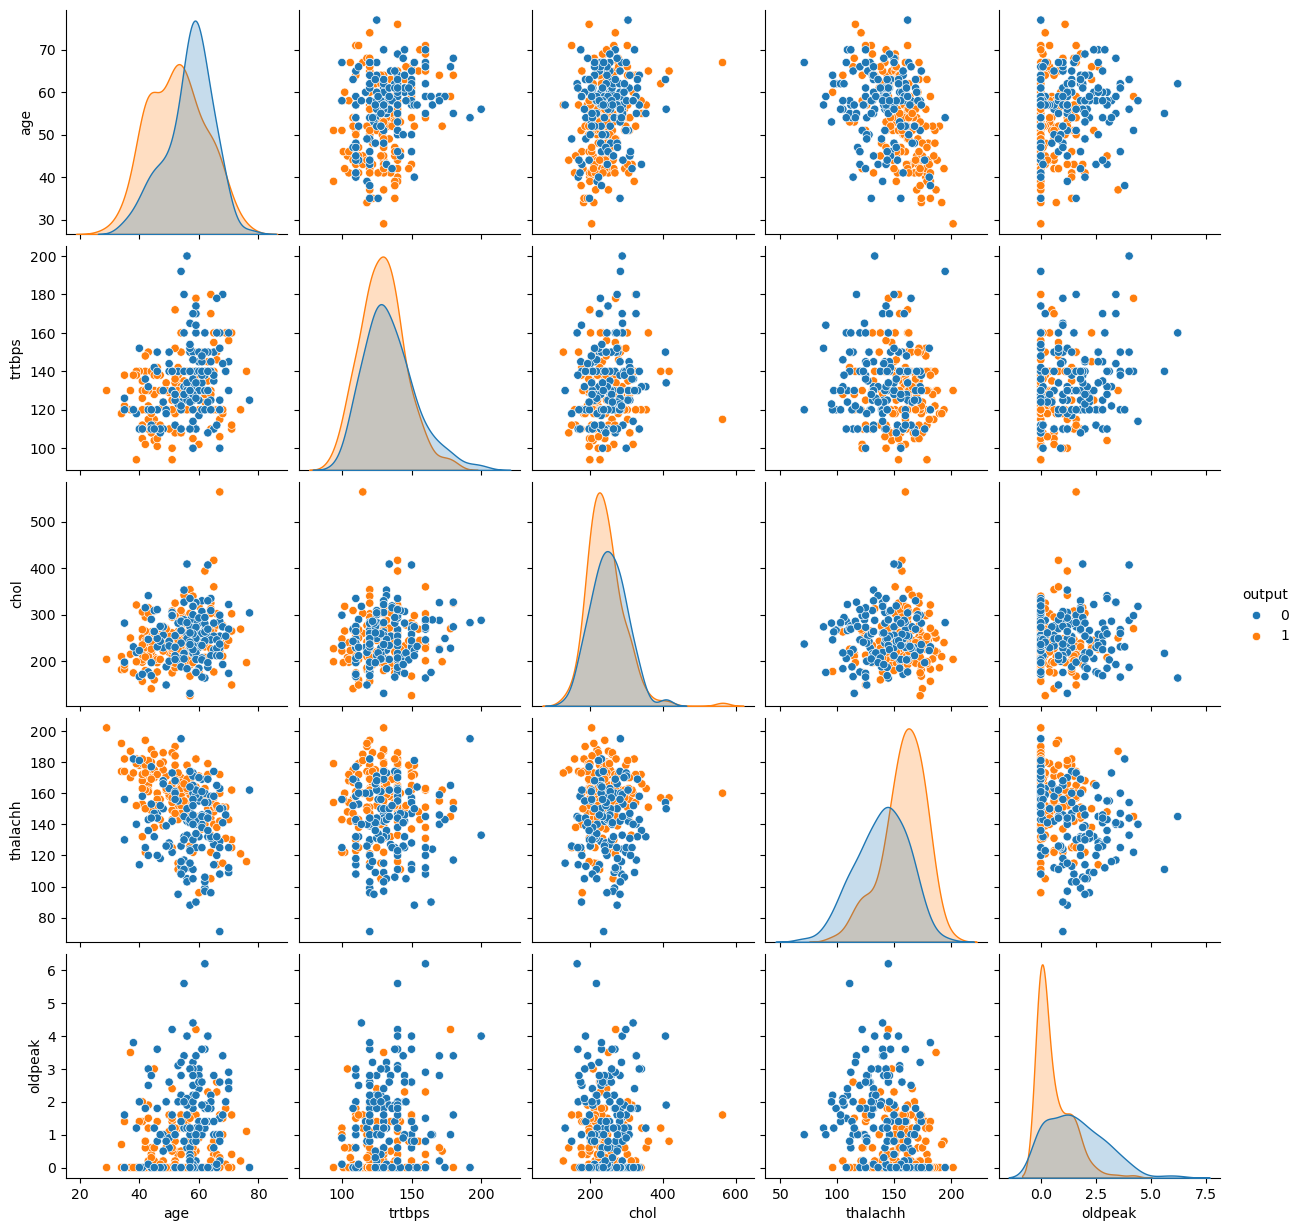

In [73]:
# pairplot for numeric columns

sns.pairplot(df[['age','trtbps','chol','thalachh','oldpeak','output']],hue='output')
# sns.pairplot(df[['age','trtbps','output']],hue='output')


From the above pair plot we can conclude that our dataset is not linearly separable.




# Conclusion  (Visualization):

1.The majority of the patients are older than 40.

2.In the dataset there are 2 times more males than females.

3.54.3% of the patients have a high risk of heart attack, 45.7% - low risk of a heart attack.

4.Age distribution of patients from the high-risk group has a peak at 57-58 ages.

5.Patients that have normal analysis results (such as electrocardiography or thallium stress test) are less likely to have a heart attack.

6.The major factors influencing heart attacks are: Chest pain, Maximum heart rate achieved, Exercise induced angina, ST depression induced by exercise relative to rest and Number of major vessels

In [77]:
#Feature Engineering and model building starts from here